# Import Packages

In [2]:
import keras
keras.__version__

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.6'

In [3]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

# Data Processing

In [4]:
from keras.datasets import reuters
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 64

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)
y_train shape: (8982,)
y_test shape: (2246,)


In [5]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

In [6]:
y_test.shape

(2246, 46)

# RNN Model Setup

In [65]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/10
6287/6287 [==============================] - 87s 14ms/step - loss: 2.5751 - acc: 0.3382 - val_loss: 2.3383 - val_acc: 0.3733
Epoch 2/10
6287/6287 [==============================] - 90s 14ms/step - loss: 2.1961 - acc: 0.4403 - val_loss: 2.3234 - val_acc: 0.3955
Epoch 3/10
6287/6287 [==============================] - 94s 15ms/step - loss: 1.7347 - acc: 0.5585 - val_loss: 2.1847 - val_acc: 0.4212
Epoch 4/10
6287/6287 [==============================] - 77s 12ms/step - loss: 1.2952 - acc: 0.6750 - val_loss: 2.2665 - val_acc: 0.4378
Epoch 5/10
6287/6287 [==============================] - 80s 13ms/step - loss: 0.9324 - acc: 0.7765 - val_loss: 2.0913 - val_acc: 0.5058
Epoch 6/10
6287/6287 [==============================] - 78s 12ms/step - loss: 0.6502 - acc: 0.8588 - val_loss: 2.1891 - val_acc: 0.4835
Epoch 7/10
6287/6287 [==============================] - 83s 13ms/step - loss: 0.4659 - acc: 0.9041 - val_loss: 2.3032 - val_acc: 0.4905


In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_43 (SimpleRNN)    (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_44 (SimpleRNN)    (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_45 (SimpleRNN)    (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_46 (SimpleRNN)    (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 46)                2990      
Total params: 676,014
Trainable params: 676,014
Non-trainable params: 0
_________________________________________________________________


# Performance Plot

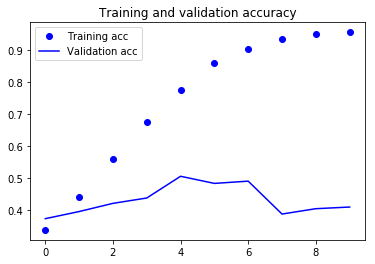

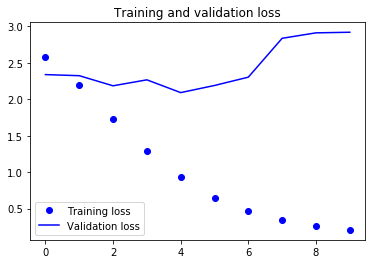

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()